In [1]:
import tensorflow as tf
import numpy as np
from finta import TA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import minmax_scale, normalize
import sys
import pylab
import numpy as np
from tensorflow.keras.layers import *
from tensorflow.keras.activations import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report

In [12]:
WINDOW_SIZE=40

In [2]:
df = pd.read_csv('SPFB2.csv')

In [8]:
df.pop('<DATE>')
df.pop('<TIME>')

0        11:00:00
1        12:00:00
2        13:00:00
3        14:00:00
4        15:00:00
           ...   
18381    20:00:00
18382    21:00:00
18383    22:00:00
18384    23:00:00
18385    00:00:00
Name: <TIME>, Length: 18386, dtype: object

In [10]:
df.columns = ['open', 'high', 'low', 'close', 'volume']

In [58]:
df['EMA'] = TA.EMA(df)

In [59]:
df['TEMA'] = TA.TEMA(df)

In [60]:
df = df.assign(**TA.BBANDS(df, MA=TA.KAMA(df)))

In [97]:
df['BBWIDTH'] = TA.BBWIDTH(df)

In [61]:
df = df.assign(**TA.CHANDELIER(df))

In [62]:
df['AO'] = TA.AO(df)

In [63]:
df['RSI'] = TA.RSI(df)

In [92]:
df = df.assign(**TA.EV_MACD(df))

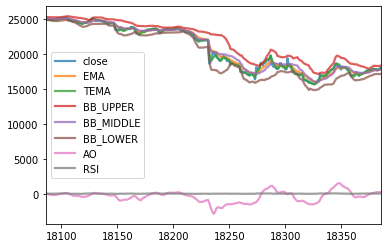

In [64]:
df[['close', 'EMA', 'TEMA', 'BB_UPPER', 'BB_MIDDLE', 'BB_LOWER', 'AO', 'RSI']][-300:].plot(linewidth=2.2, alpha=0.75)
plt.savefig('plt.png', dpi=800)

In [90]:
df

,open,high,low,close,volume,SMA,TEMA,BB_UPPER,BB_MIDDLE,BB_LOWER,EMA,Short.,Long.,AO,RSI,MACD,SIGNAL
0,5562.0,5618.0,5496.0,5526.0,62418,NaN,5526.000000,NaN,NaN,NaN,5526.000000,NaN,NaN,NaN,NaN,0.000000,0.000000
1,5525.0,5763.0,5510.0,5740.0,65303,NaN,5721.212620,NaN,NaN,NaN,5644.888889,NaN,NaN,NaN,100.000000,4.801282,2.667379
2,5744.0,5800.0,5716.0,5745.0,36380,NaN,5756.685334,NaN,NaN,NaN,5685.918033,NaN,NaN,NaN,100.000000,6.272836,4.145025
3,5742.0,5759.0,5709.0,5720.0,16531,NaN,5744.531480,NaN,NaN,NaN,5697.463415,NaN,NaN,NaN,86.847028,5.885781,4.734712
4,5719.0,5773.0,5711.0,5729.0,17338,NaN,5741.881050,NaN,NaN,NaN,5706.844836,NaN,NaN,NaN,87.528418,5.909681,5.084239
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18381,17753.0,18045.0,17643.0,17850.0,31006,17651.769231,17889.428371,18340.772522,17752.879371,17164.986219,17730.592041,16267.363636,17032.363636,237.220588,62.124966,106.720102,57.527815
18382,17864.0,17931.0,17642.0,17660.0,13245,17678.461538,17801.855675,18316.004453,17751.517765,17187.031077,17716.473632,16395.954545,17019.954545,268.858824,49.936970,96.794810,65.381214
18383,17657.0,17769.0,17601.0,17742.0,9140,17710.153846,17781.958078,18324.131143,17751.418153,17178.705164,17721.578906,16424.545455,17031.545455,252.955882,54.392605,94.456819,71.196335
18384,17743.0,17938.0,17717.0,17926.0,5814,17747.538462,17856.763819,18351.256558,17759.363511,17167.470464,17762.463125,16536.727273,17033.727273,239.117647,62.933860,106.226692,78.202407


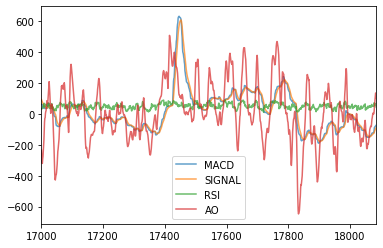

In [96]:
df[['MACD', 'SIGNAL', 'RSI', 'AO']][17000:-300].plot(alpha=0.7)
plt.savefig('macd.png', dpi=800)